# Métodos III - Cálculo Vectorial


## Integral de línea


Jose A. Hernando

*Departamento de Física de Partículas. Universidade de Santiago de Compostela*

Marzo 2019


In [1]:
import time
print(' Last version ', time.asctime() )

### Objectivos

Revisar la parametrización de líneas o trayectorias.

Definir la integral de una función escalar y vectorial a lo largo de una línea.

Mostrar algunos ejemplos sencillos.

In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import graph_utils as gf

figsize = 6, 3.8
cmap    = 'hot'

### Integral de línea

#### Revisión de parametrización de líneas.

Hemos visto con anterioridad que podemos parametrizar una línea, ${\bf c}(t)$, de un especio $\mathrm{R}^n$, con $n>1$, como una función vectorial definida en un intervalo $[t_a, t_b]$ de $\mathrm{R}$.


*Ejemplo*: parametrización de una circunferencia de radio $r$:
$$
t \in [0, 2 \pi) \to \left( r \cos \omega t , r \sin \omega t \right)
$$
con $\omega = 1$

*Ejemplo*: parametrización de una hélice de $n$ vueltas, de radio $r$:
$$
t \in [0, 2 n \pi] \to \left( r \cos \omega t, r \sin \omega t, v_z t \right)
$$
con $v_z = 1, \; \omega = 1$. 

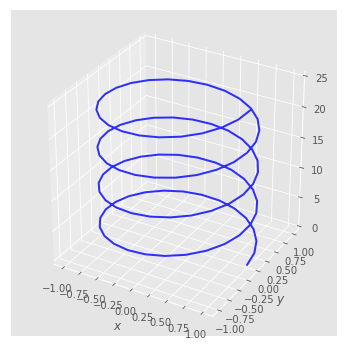

In [3]:
r, w, vz, n = 1., 1., 1., 4
trange = (0., 2*n*np.pi, 100)
xfun = lambda t : r  * np.cos( w * t)
yfun = lambda t : r  * np.sin( w * t)
zfun = lambda t : vz * t
gf.line3d(xfun, yfun, zfun, trange);

Calculamos la longitud de arco, $s$, de una línea, mediante la integral en una dimensión dada por:

$$
s = \int_{{\bf c}} \, \mathrm{d}s = \int_{t_a}^{t_b} | \dot{{\bf c}}(t) | \mathrm{d}t
$$
donde 
$$
{\bf \dot{c}}(t) = \left( \frac{\mathrm{d} x_1 (t)}{\mathrm{d}t}, \dots, 
\frac{\mathrm{d}x_n(t)}{\mathrm{d}t}\right)
$$
es la derivada de ${\bf c}(t)$.

Y
$$
\mathrm{d}s = | {\bf \dot{c}}(t)| \, \mathrm{d}t
$$
es un diferencial de distancia. Fíjate que es un escalar.

En física, si $t$ es el tiempo, ${\bf c}(t)$ es la trayectoria de un móvil, ${\bf \dot{c}}(t)$, es la velocidad, y $\mathrm{d}{\bf s} = |{\bf \dot{c}}(t)| \mathrm{d}t$, el diferencial de distancia recorrido en un diferencial de tiempo $\mathrm{d}t$.

#### Integral de una función escalar a lo largo de una línea

El una famosa escena de la novela homónima, Tom Sowyer convence a sus amigos para que pinten por él la valla que su tia Polly le ha obligado pintar como castigo por hacer novillos. ¿Sabría Tom Sayer qué superficie tiene la valla, cuánto pintura necesita? https://www.youtube.com/watch?v=kmJLCvp4UD4

La valla recorre sobre la base una línea, ${\bf c}(t)$, y tiene un altura, $f(x, y)$ en cada punto de esa línea, $f({\bf c}(t))$.

Él área de la valla, $\mathcal{A}$, será la integral de la función altura, $f(x, y)$, a lo largo de la línea de su base, ${\bf c}(t)$, parametrizada en función de $t$.

$$
\mathcal{A} = \int_{{\bf c}} f({\bf x}) \, \mathrm{d} s = \int_{t_a}^{t_b} f({\bf c}(t)) \, |{\bf \dot{c}}(t)| \mathrm{d}t 
$$

que si te fijas, aunque aparecen vectores, es simplemente una integral de 1 dimensión en $t$.

*Ejercicio*: Calcula la integral de línea de la función $f(x, y) = x- y$ a lo largo de la circunferencia de radio unidad.


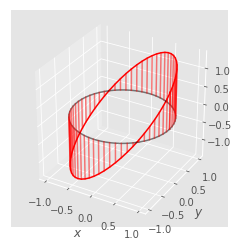

In [4]:
trange = (0., 2.*np.pi, 60)
cx = lambda t   : np.cos(t)
cy = lambda t   : np.sin(t)
fc = lambda x, y: x + y
gf.int_fscalar_line(fc, cx, cy, trange)

La circunferencia de radio unidad puede parametrizarse con:

$$
{\bf c}(t) = \left( \cos t, \sin t \right), \;\; t \in [0, \,2 \pi)
$$

El diferencia de longitud de arco:
$$
{\bf \dot{c}}(t) = \left( -\sin t, \cos t \right) \to \mathrm{d} s = |{\bf \dot{c}}(t)| \mathrm{d}t = \sqrt{sin^2 t + cos^2 t} \; \mathrm{d}t = \mathrm{d}t
$$

La integral a lo largo de la circunferencia,

$$
\int_{{\bf c}} (x + y) \, \mathrm{d} s = \int_{0}^{2 \pi} (\sin t + \cos t) \mathrm{d}t  = \cos t - \sin t \Big|_0^{2 \pi} = 0
$$

*Ejercicio*: Calcula la integral de la función $f(x, y) = 1 + y/3$, a lo largo de la línea parametrizada por: $(3 \cos^3 t, 3 \sin^3 t)$ con $t \in [0, \pi/2]$.

$$
{\bf c}(t) = \left( 3 \cos^3 t, 3 \sin^3t \right) \to {\bf \dot{c}}(t) = 9 \cos t \sin t \left( \cos t, \sin t \right)
$$

$$
\mathrm{d} s = |\dot{{\bf c}}(t)| \mathrm{d}t  = 9 \cos t \sin t 
$$

$$
f({\bf c} (t))  = (1 + \sin^3 t) 
$$

Luego:

$$
\int_{{\bf c}} f(x, y) \, \mathrm{d}s = \int_0^{\pi/2} 9 \cos t \sin t \, ( 1 + \sin^3 t) \mathrm{d}t
$$
$$
= 9 \left[ \frac{\sin^3 t}{2} + \frac{\sin^5 t}{5} \right]_0^{\pi/2} = 9 \frac{7}{10}
$$

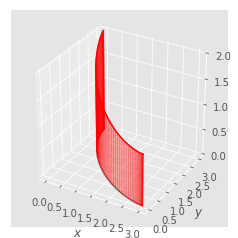

In [5]:
trange = (0., np.pi/2., 60)
cx = lambda t   : 3. * np.cos(t)**3
cy = lambda t   : 3. * np.sin(t)**3
fc = lambda x, y: 1 + y/3.
gf.int_fscalar_line(fc, cx, cy, trange)

#### Integral de una función vectorial a lo largo de una línea

Definimos la integral de una función vectoral, ${\bf f}({\bf x})$, a lo largo de una línea, ${\bf c}(t)$, con $t \in [t_0, t_1]$, como:

$$
\int_{{\bf c}} {\bf f} ({\bf x}) \, \mathrm{d} {\bf s} = \int_{t_0}^{t_1} {\bf f}({\bf c}(t)) \, {\bf {\dot c}}(t) \mathrm{d} t
$$

donde ${\bf f}({\bf c}(t))$ es la función valorada a lo largo de la línea, $\mathrm{d} {\bf s} = {\bf \dot{c}}(t) \mathrm{d} t$, es el elemento diferencial de arco. Fíjate que ahora es un deferencial vectorial y que integramos el producto escalar entre ambos.


*Ejemplo:* Sea la función vectoral ${\bf E}(x, y) = (0, E_0)$. 
Calcular la integral a lo largo de una línea horizonal, otra vertical y en la diagonal.

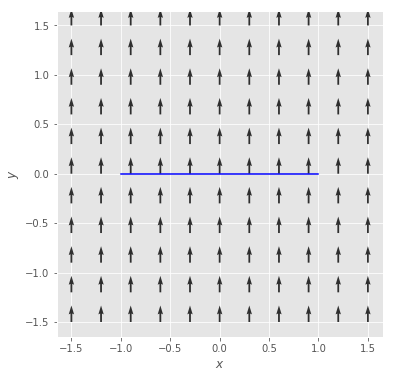

In [6]:
xrange = (-1.5, 1.5, 11)
trange = (-1, 1., 40)
Ex = lambda x, y : 0 + 0.*x
Ey = lambda x, y : 1.+ 0.*x
cx = lambda t    : t
cy = lambda t    : 0*t
gf.line2d(cx, cy, trange); 
gf.quiver2d(Ex, Ey, xrange, xrange);

*Ejemplo*: Calcula la integral de la función ${\bf F}(x,y) = (x, y)$ a lo largo de la circunferencia de radio unidad.

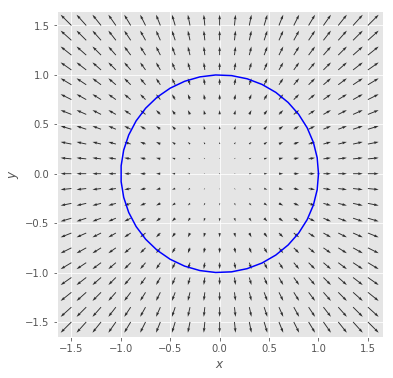

In [7]:
xrange = (-1.5, 1.5, 21)
trange = (0, 2.*np.pi, 40)
Ex = lambda x, y : x
Ey = lambda x, y : y
cx = lambda t    : np.cos(t)
cy = lambda t    : np.sin(t)
gf.line2d(cx, cy, trange); 
gf.quiver2d(Ex, Ey, xrange, xrange);

En la literatura es normal encontrar la expresión:
    
$$
\mathrm{d} {\bf s} = (\mathrm{d}x, \mathrm{d} y) \to {\bf {\dot c}} \, \mathrm{d} t = 
(\dot{x}, \dot{y}) \, \mathrm{d}t
$$

Y por lo tanto:

$$
{\bf F} \, \mathrm{d}{\bf s} = F_x \mathrm{d}x + F_y \mathrm{d}y \to (F_x \dot{x} + F_y \dot{y}) \, \mathrm{d}t
$$

    

*Ejercicio*: Calcula la integral a lo largo de la elipse de ejes $a$ en $x$ y $b$ en $y$ en sentido anti-horario de las funciones vectoriales: $(-y, x)/2$, $(-y, 0)$ y $(0, x)$. Relacionalas con el área de la elipse.

*Observa*: En la siguiente figura se muestra el campo $(-y, 0)$ y la elipse. Hazte una idea de cómo es el producto escalar entre el campo y $\mathrm{d}{\bf s}$ a lo largo de elipse. ¿Dónde es mayor? ¿Dónde es nulo?

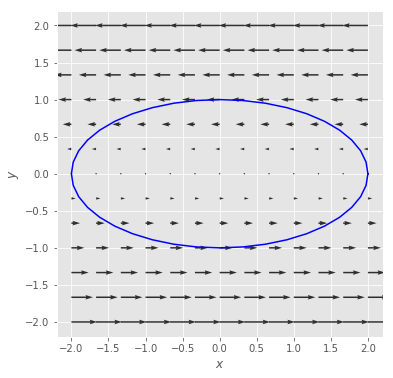

In [8]:
a, b = 2., 1.
xrange = (-2.0, 2.0, 13)
trange = (0, 2.*np.pi, 41)
Ex = lambda x, y :    -y * 1.
Ey = lambda x, y :     x * 0.
cx = lambda t    : a * np.cos(t)
cy = lambda t    : b * np.sin(t)
gf.line2d(cx, cy, trange); 
gf.quiver2d(Ex, Ey, xrange, xrange);

*Observa*: En las siguiente figura se muestra la elipse y en la dirección $z$ el valor $f({\bf c}(t))$. ¿Coincide con lo que antes habías deducido?

integral  1.9917854704871227


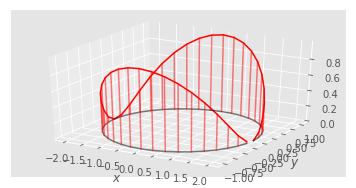

In [9]:
val = gf.int_fvect_line(Ex, Ey, cx, cy, trange, surf = False);
print('integral ', val/np.pi)

*Observa*: En las siguiente figura se muestra la elipse y la descomposición del producto $({\bf F}\, \mathrm{d}{\bf s})$ en $F_x \, \mathrm{d}x$ y $F_y \, \mathrm{d}y$ para una partición de $t \in [0, 2 \pi)$. Como puedes ver obtenemos rectángulos. Si el rectángulo es azul indica que $\mathrm{d}x >0$ y rojo $\mathrm{d}x <0$. Para el campo ${\bf F}(x, y) = (y, 0)$, las bases son $\mathrm{d}x$ y la altura en $y(x)$.

Así se entiende que la integral del campo ${\bf F} = (y,0)$ a lo largo de la elipse, recorriéndola por ejemplo en dirección horaria, corresponde a la suma del área de los rectángulos, $ y(x) \mathrm{d}x$, que nos cubren la región de la elipse, y por lo tanto, la integral de este campo, $(y, 0)$, a lo largo de la elipse sea igual al área.

integral  1.9913593655447601


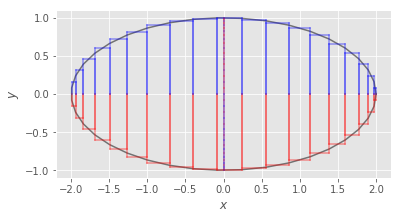

In [10]:
trange = (0., 2.*np.pi, 40)
val = gf.int_fvect_line(Ex, Ey, cx, cy, trange);
print('integral ', val/np.pi)

La elipse podemos parametrizarla con:

$$
{\bf c}(t) = \left(a \cos t, b \sin t \right), \; t \in [0, 2 \pi)
$$

su derivada es:

$$
\dot{{\bf c}}(t) = \left(-a \sin t, b \cos t \right)
$$

El campo, ${\bf F}(x, y) = (-y, x)/2$ valorado en la elipse es:

$$
{\bf F}({\bf c}(t)) = (-b \sin t, a \cos t)/2
$$

Por lo tanto el producto:

$$
{\bf F}({\bf c}(t)) \, \dot{{\bf c}}(t) = ab \, (\sin^2 t +\cos^2 t)/2 = ab/2 
$$

Luego:
$$
\int_{{\bf c}} {\bf F} \, \mathrm{d}{\bf s} = \int_0^{2\pi} \frac{ab}{2} \mathrm{d}t = \frac{ab}{2} t \big|_0^{2\pi}= a b \pi 
$$



